<a href="https://colab.research.google.com/github/venkat215/PyTorch-Learning/blob/master/PyTorch_First_FFN_Abstracted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

import torch
import torch.nn.functional as F
from torch import optim
import torch.nn as nn

**Generate blobs using scikit-learn**

These blobs aren't linearly seperable hence we try Neural Networks

In [159]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [161]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


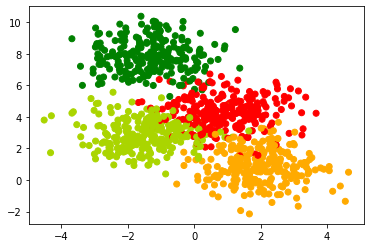

In [162]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

**Split data into training and testing sets**

In [163]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


**Convert datatypes**

We convert Y to float as it is a class label and we use it later for plotting

In [164]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape)
X_train = X_train.float()
Y_train = Y_train.long()
X_val = X_val.float()
Y_val = Y_val.long()

torch.Size([750, 2]) torch.Size([750])


**Create a child class of the nn.Module class from PyTorch**

Our ANN has 4 layers:

1) Input layer (2 x 2 as we have two features and inputs) Activation: Sigmoid <br>
2) 1st hidden layer (2 x 2) Activation: Sigmoid <br>
3) 2nd hidden layer (2 x 2) Activation: Sigmoid <br>
4) Output layer (2 x 4) Activation: Softmax



In [0]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2),
        nn.Sigmoid(), 
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

**Fit fucntion that trains our NN for the required number of epochs**

Note that the fit fuction alse plots the fluction in the loss for each epoch.

In [0]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  loss_arr = []

  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    loss_arr.append(loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()
    
  plt.plot(loss_arr, 'r-')
  plt.show()
  print('Loss before training', loss_arr[0])

  return loss.item()

**Custom function to initialize weights**

We use Xavier_uniform initialization.

In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        nn.init.constant_(m.bias, 0)

**Train the network for 500 epochs @ 0.1 learning rate**

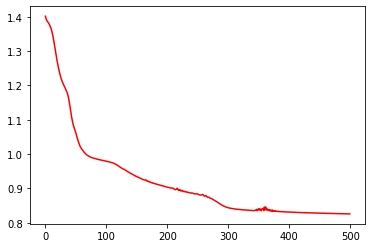

Loss before training 1.4014211893081665


0.8258711695671082

In [171]:
fn = FirstNetwork_v2()
fn.apply(init_weights)
loss_fn = F.cross_entropy
opt = optim.Adam(fn.parameters(), lr=0.1, betas=(0.9, 0.999))
fit_v2(X_train, Y_train, fn, opt, loss_fn, 500)

**We finally test the model against our validation data**

Blobs with larger size are incorrectly predicted

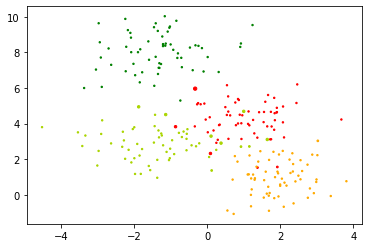

In [172]:
with torch.no_grad():
  pred_prob = fn(X_val)
  pred_class = torch.argmax(pred_prob, dim=1)
  size = (pred_class-Y_val)**2+2
  plt.scatter(X_val[:,0], X_val[:,1], c=Y_val, cmap=my_cmap, s=size)
  plt.show()

**After hyperparameter tuning we get an accuracy of around 94%**

In [173]:
validation_accuracy = (((size - 2) == 0).float().mean().item())*100
validation_accuracy

93.99999976158142